-------------------------------------
### Importing necessary libraries

In [607]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

-------------------------------------
## 2. Importing Data

In [608]:
df = pd.read_csv('../dataset/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [609]:
df.shape

(1030, 9)

---------------------------------------------
## 3. Data Preprocessing


----------------------------------
### 3.1 Missing value treatment

In [610]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

----------------------------------
### 3.2 Handling data types

In [611]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

---------------------------
# splitting the data in to X & Y  base model before outlier treatment

In [612]:
#splitting the data in to X & Y 
x1=df.drop('concrete_compressive_strength', axis=1)
x1.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [613]:
y1=df['concrete_compressive_strength']
y1.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [614]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1train.shape,x1test.shape,y1train.shape,y1test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on base model before outlier treatment

In [615]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x1train, y1train)

# Calculate R-squared and Adjusted R-squared
lin_base_r2 = lr.score(x1train, y1train)
lin_base_ar2 = 1 - ((1 - lin_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)

# Make predictions on the test data
p1 = lr.predict(x1test)

# Calculate Root Mean Squared Error
lin_base_mse = metrics.mean_squared_error(y1test, p1)
lin_base_rmse = np.sqrt(lin_base_mse)

# Print the results
print(f"R2: {lin_base_r2:.4f}")
print(f"Adjusted R2: {lin_base_ar2:.4f}")
print(f"RMSE: {lin_base_rmse:.4f}")


R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


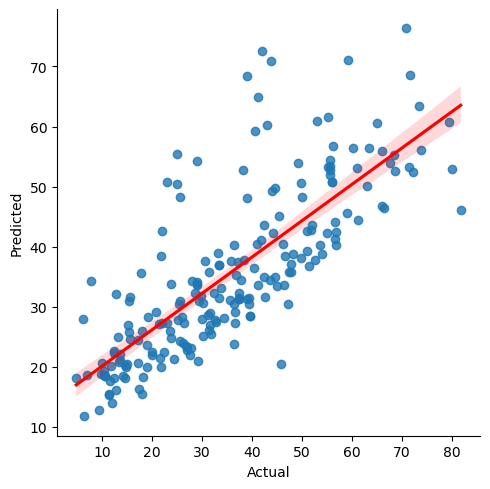

In [616]:
lin_df_1=pd.DataFrame({"Actual":y1test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6155
Adjusted R2: 0.6118
RMSE: 11.1558


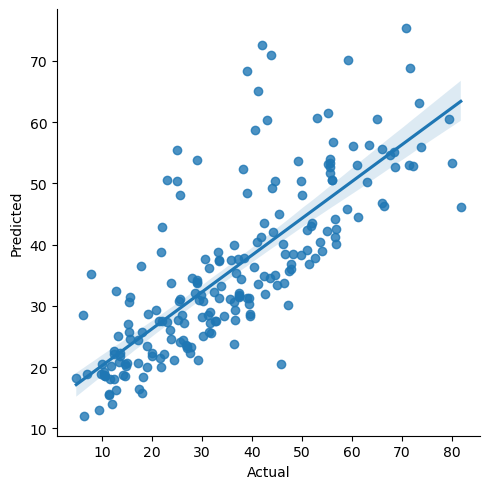

In [617]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x1train, y1train)

# Predictions
las_base_p = la.predict(x1test)

# Evaluation
las_base_r2 = la.score(x1train, y1train)
las_base_ar2 = 1 - ((1 - las_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)
las_base_mse = metrics.mean_squared_error(y1test, las_base_p)
las_base_rmse = np.sqrt(las_base_mse)

# Display Results
print(f"R2: {las_base_r2:.4f}")
print(f"Adjusted R2: {las_base_ar2:.4f}")
print(f"RMSE: {las_base_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y1test, "Predicted": las_base_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")

---------------------------------
## Ridge

R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


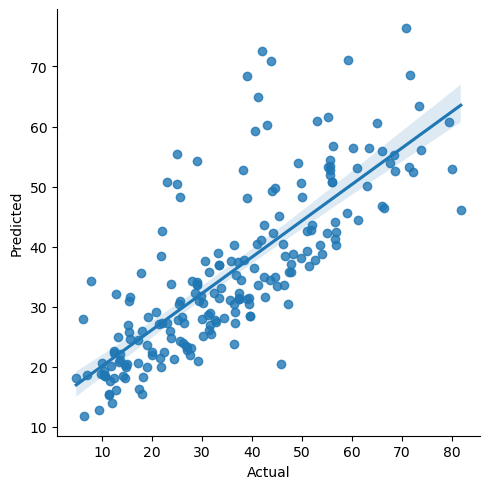

In [618]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x1train, y1train)

# Predictions
rid_base_p = rd.predict(x1test)

# Evaluation
rid_base_r2 = rd.score(x1train, y1train)
rid_base_ar2 = 1 - ((1 - rid_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)
rid_base_mse = metrics.mean_squared_error(y1test, rid_base_p)
rid_base_rmse = np.sqrt(rid_base_mse)

# Display Results
print(f"R2: {rid_base_r2:.4f}")
print(f"Adjusted R2: {rid_base_ar2:.4f}")
print(f"RMSE: {rid_base_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y1test, "Predicted": rid_base_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [619]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x1train,y1train)
xgbr_p_1 = xgbr.predict(x1test)
xgbr_base_r2 = xgbr.score(x1train,y1train)
print("R square:", xgbr_base_r2)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
xgbr_base_ar2 = 1 - ((1 - xgbr_base_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_base_ar2)
from sklearn import metrics
xgbr_base_mse = metrics.mean_squared_error(y1test,xgbr_p_1)
# print("mse:", xgbr_base_mse)
xgbr_base_rmse = np.sqrt(xgbr_base_mse)
print("XGBR rmse:- ",xgbr_base_rmse)

R square: 0.9238144025487851
Adjusted R square: 0.9230665684633744
XGBR rmse:-  6.316848714303042


--------------------------
## RF-Regressor

In [620]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x1train,y1train)
rfr_p_1 = rfr.predict(x1test)
rfr_base_r2 = rfr.score(x1train,y1train)
print("R square:", rfr_base_r2)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
rfr_base_ar2 = 1 - ((1 - rfr_base_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_base_ar2)
from sklearn import metrics
rfr_base_mse = metrics.mean_squared_error(y1test,rfr_p_1)
# print("mse:", rfr_base_mse)
rfr_base_rmse = np.sqrt(rfr_base_mse)
print("rfr rmse:- ",rfr_base_rmse)

R square: 0.9869216826663972
Adjusted R square: 0.9867933065453312
rfr rmse:-  5.4322913823418135


# Comparision of Base model

In [621]:
list1=['linear','Lasso','Ridge','RFR','XGBR']
list2=[lin_base_r2,las_base_r2,rid_base_r2,rfr_base_r2,xgbr_base_r2]
list3=[lin_base_ar2,las_base_ar2,rid_base_ar2,rfr_base_ar2,xgbr_base_ar2]
list4=[lin_base_rmse,las_base_rmse,rid_base_rmse,rfr_base_rmse,xgbr_base_rmse]

In [622]:
final=pd.DataFrame({'modelname':list1,'r2':list2,'a_r2':list3,'rmse':list4})
final

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.986922,0.986793,5.432291
4,XGBR,0.923814,0.923067,6.316849


---------------------------------------
# Outlier Treatment

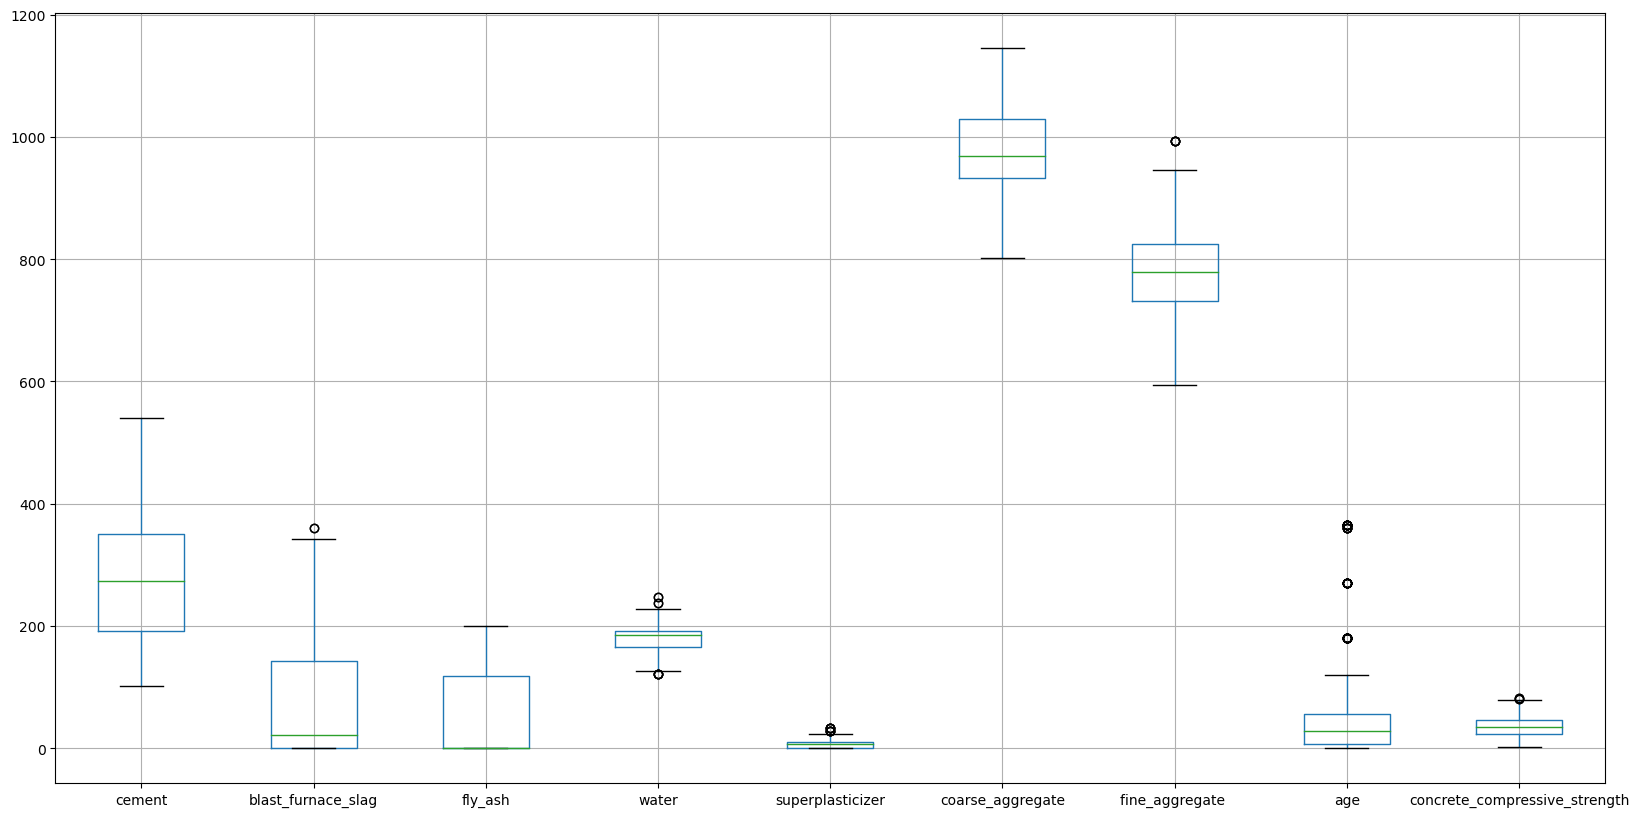

In [623]:
df.boxplot(figsize=(20,10))
plt.show()

In [624]:
def histdist(dataframe, column):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[column])
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('distplot ' + column)

    plt.subplot(1, 2, 2)
    dataframe[column].hist(figsize=(15, 6))
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Histogram ' + column)

    plt.tight_layout()
    plt.show()

In [625]:
def iqrdf(dataframe, column, multiplier=3):
    IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
    print("IQR -", IQR)

    l_b = dataframe[column].quantile(0.25) - (IQR * multiplier)
    u_b = dataframe[column].quantile(0.75) + (IQR * multiplier)
    print("Lower Boundary: ", l_b)
    print("Upper Boundary: ", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b

def stddf(df, column, multiplier=3):
    print("Column Name:", column)

    u_b = df[column].mean() + multiplier * df[column].std()
    l_b = df[column].mean() - multiplier * df[column].std()
    print("Lower Boundary:", l_b)
    print("Upper Boundary:", u_b)

    outliers_below = df[df[column] < l_b]
    outliers_above = df[df[column] > u_b]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    df.loc[df[column] > u_b, column] = u_b
    df.loc[df[column] < l_b, column] = l_b


In [626]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [627]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


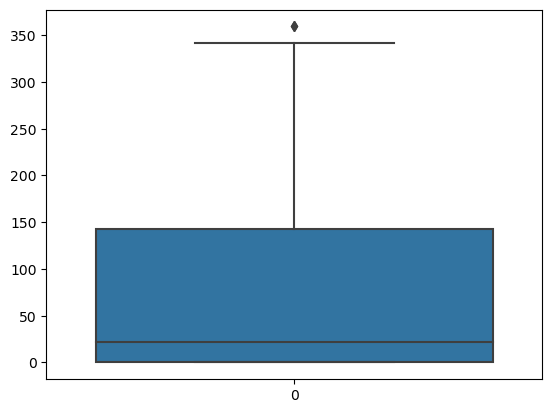

In [628]:
sns.boxplot(df.blast_furnace_slag)
plt.show()

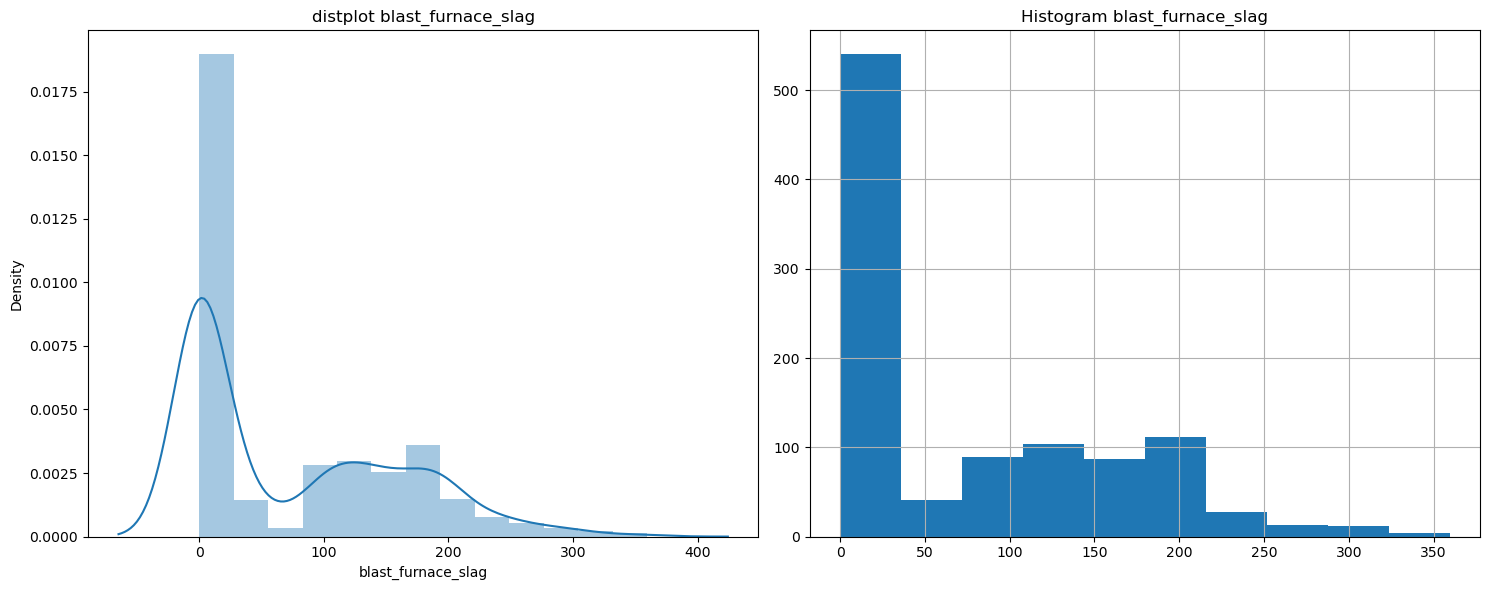

In [629]:
histdist(df,"blast_furnace_slag")

In [630]:
iqrdf(df,'blast_furnace_slag',multiplier=1.5)

IQR - 142.95
Lower Boundary:  -214.42499999999998
Upper Boundary:  357.375
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 2


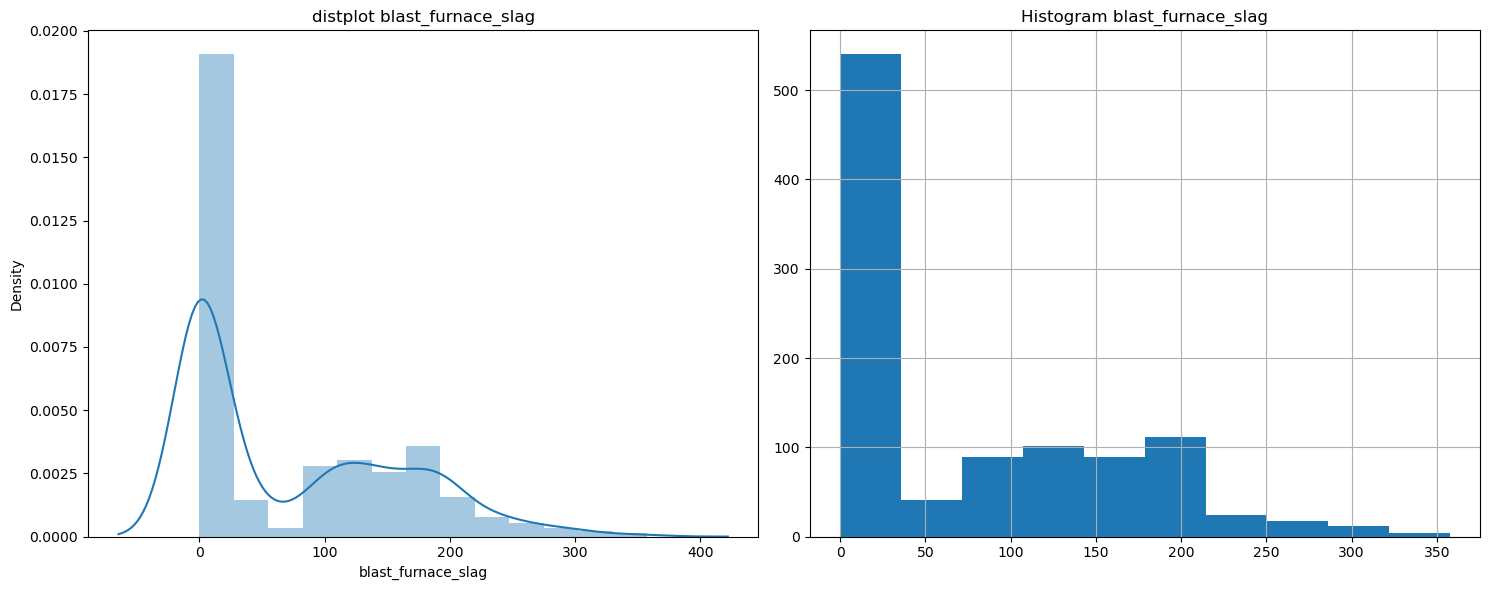

In [631]:
histdist(df,'blast_furnace_slag')

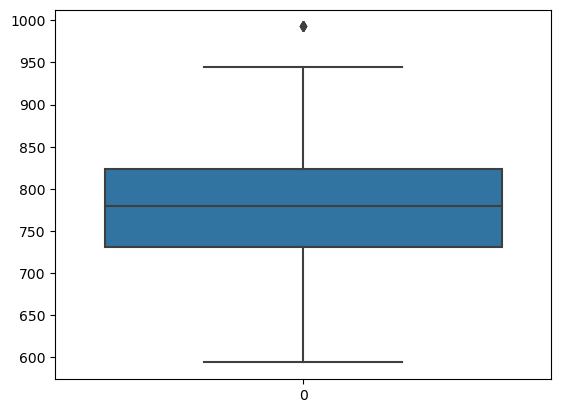

In [632]:
sns.boxplot(df["fine_aggregate "])
plt.show()

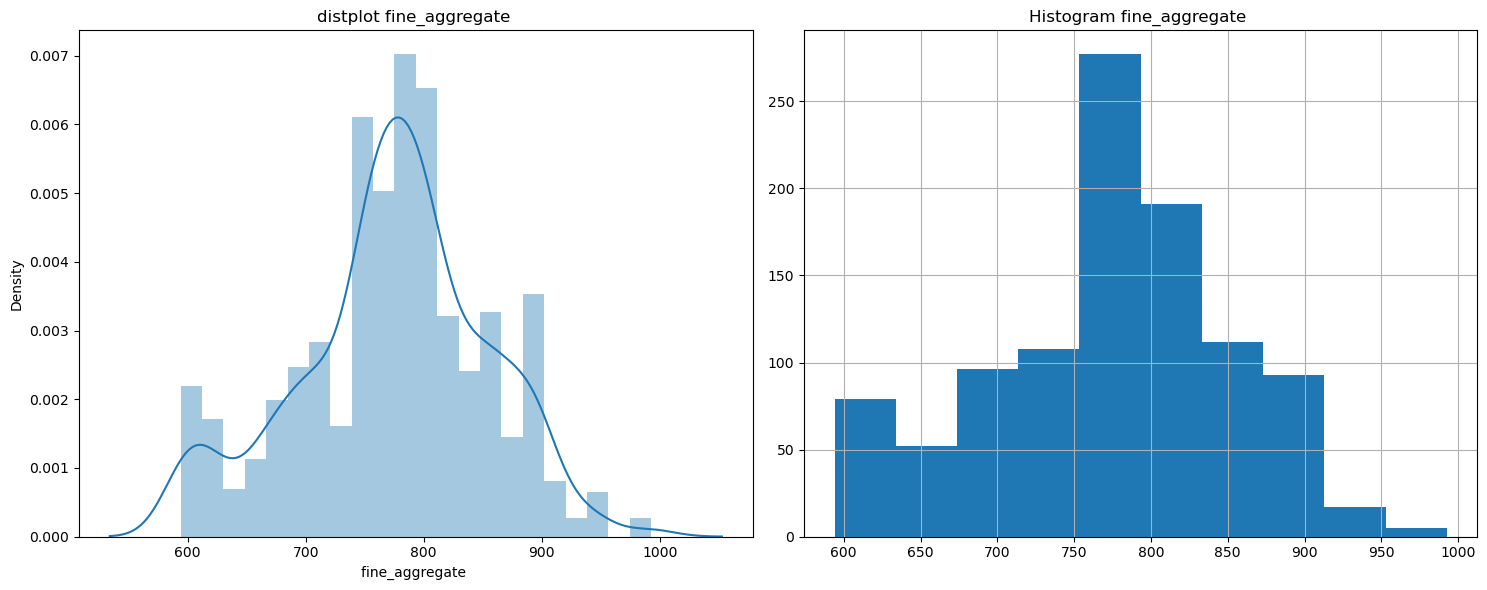

In [633]:
histdist(df,"fine_aggregate ")

In [634]:
stddf(df,'fine_aggregate ',multiplier=2)

Column Name: fine_aggregate 
Lower Boundary: 613.2285251520846
Upper Boundary: 933.9324457217019
Number of outliers below the lower boundary: 65
Number of outliers above the upper boundary: 17


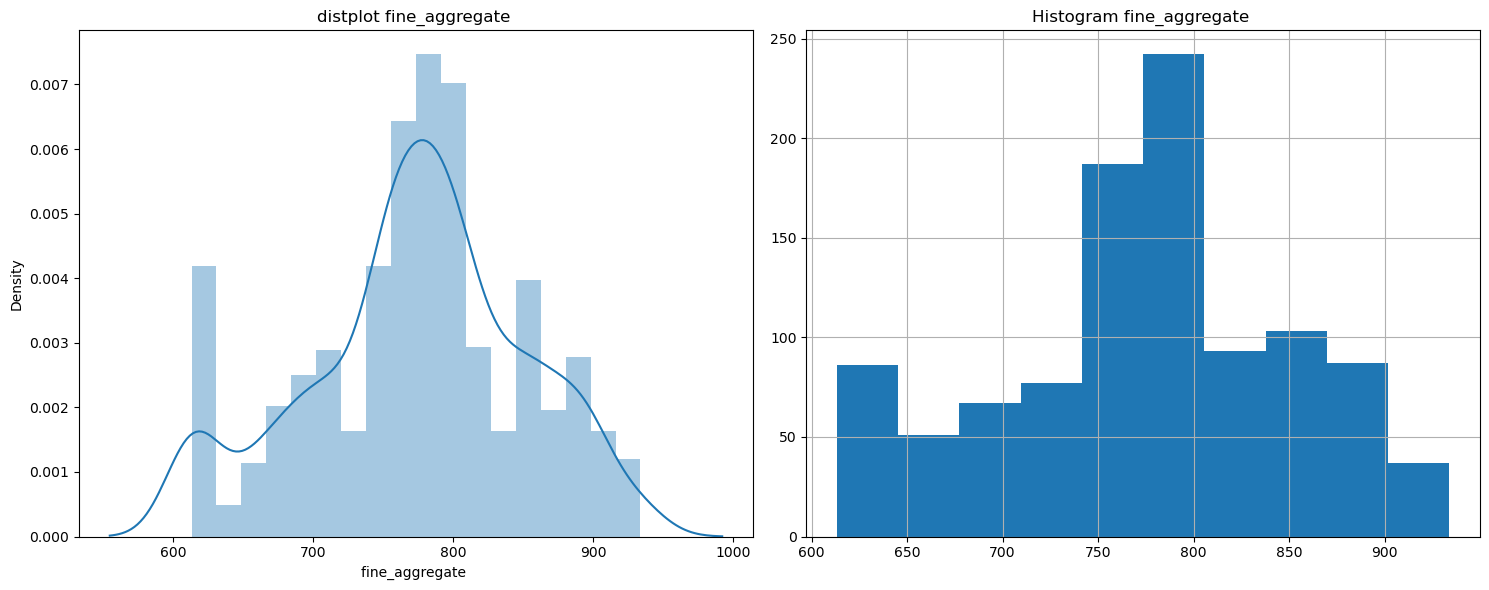

In [635]:
histdist(df,"fine_aggregate ")

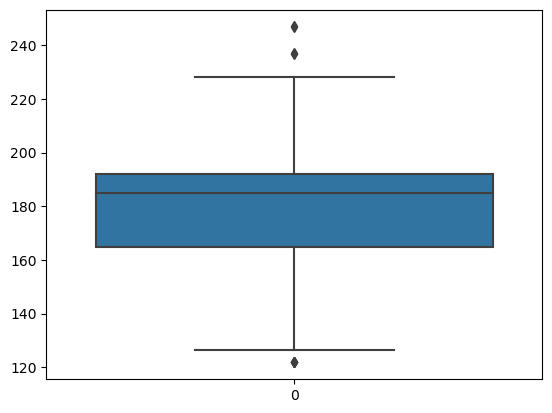

In [636]:
sns.boxplot(df.water)
plt.show()

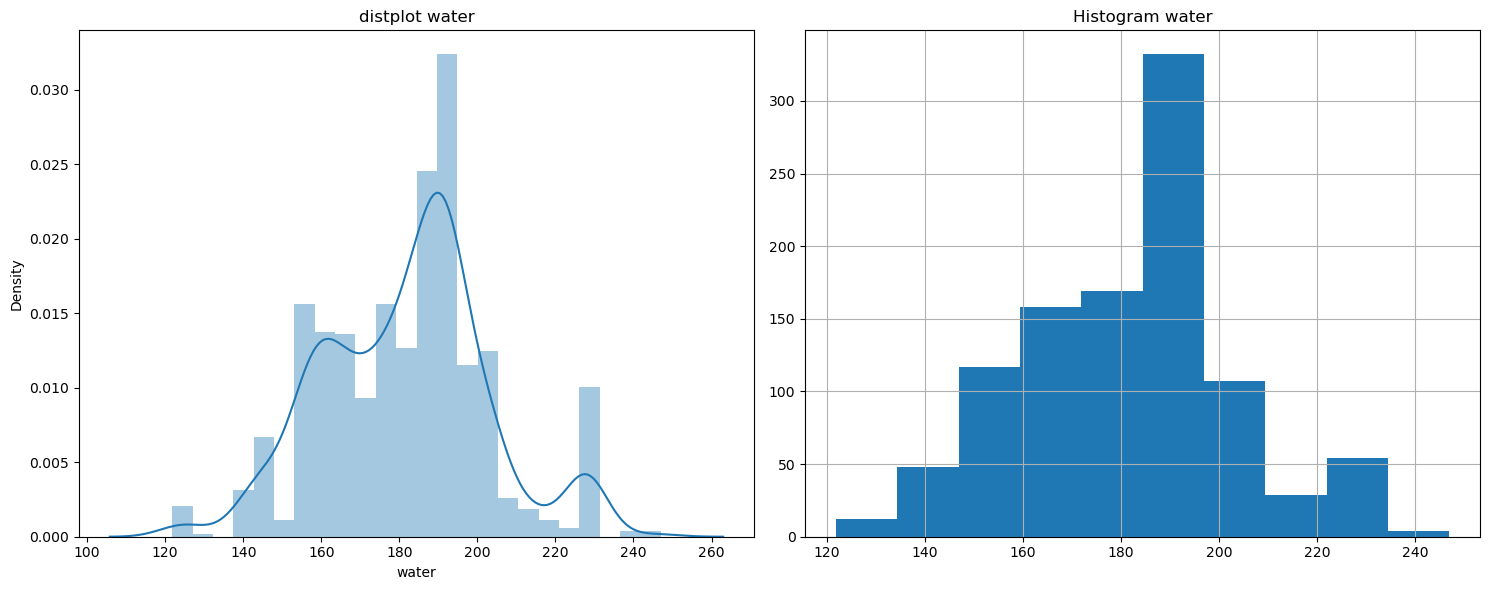

In [637]:
histdist(df,"water")

In [638]:
stddf(df,'water',multiplier=2.5)

Column Name: water
Lower Boundary: 128.18173514081676
Upper Boundary: 234.95282796597937
Number of outliers below the lower boundary: 12
Number of outliers above the upper boundary: 4


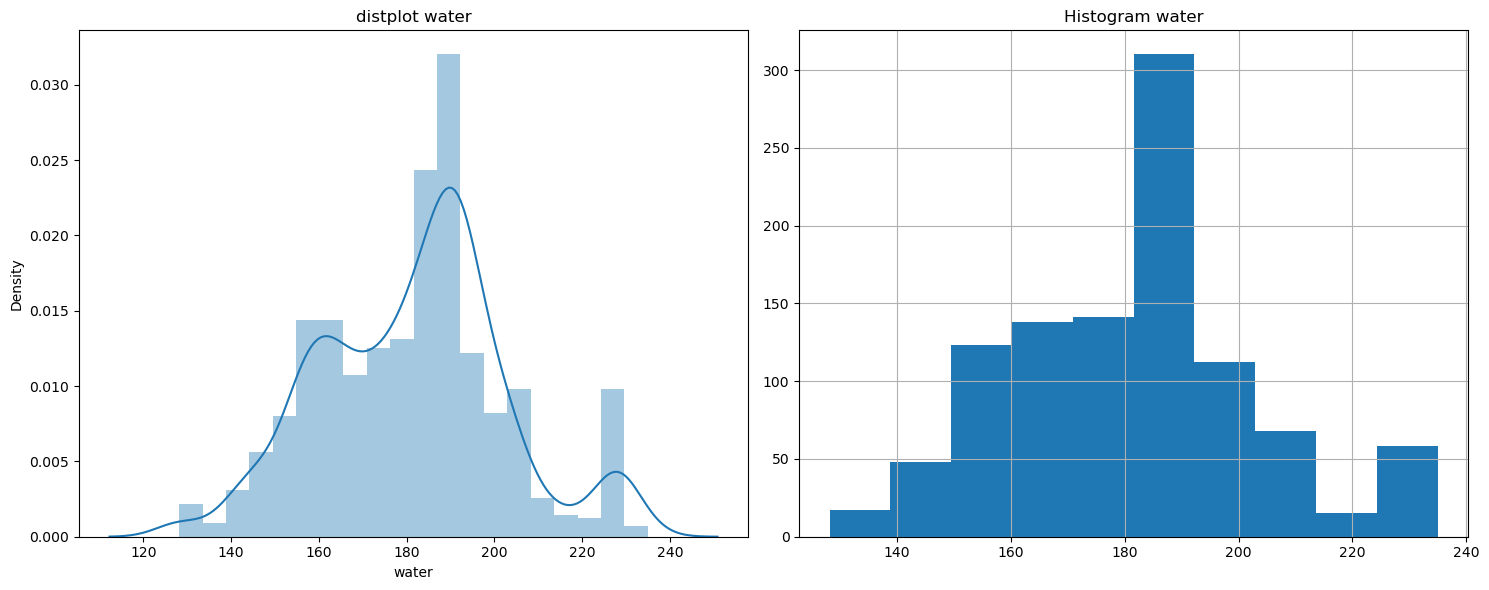

In [639]:
histdist(df,'water')

---------------------------
# splitting the data in to X & Y model after outlier treatment

In [640]:
#splitting the data in to X & Y 
x2=df.drop('concrete_compressive_strength', axis=1)
x2.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [641]:
y2=df['concrete_compressive_strength']
y2.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [642]:
from sklearn.model_selection import train_test_split
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=101)
x2train.shape,x2test.shape,y2train.shape,y2test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on model after outlier treatment

In [643]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x2train, y2train)

# Calculate R-squared and Adjusted R-squared
lin_eda_r2 = lr.score(x2train, y2train)
lin_eda_ar2 = 1 - ((1 - lin_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)

# Make predictions on the test data
p1 = lr.predict(x2test)

# Calculate Root Mean Squared Error
lin_eda_mse = metrics.mean_squared_error(y2test, p1)
lin_eda_rmse = np.sqrt(lin_eda_mse)

# Print the results
print(f"R2: {lin_eda_r2:.4f}")
print(f"Adjusted R2: {lin_eda_ar2:.4f}")
print(f"RMSE: {lin_eda_rmse:.4f}")


R2: 0.6163
Adjusted R2: 0.6126
RMSE: 11.1239


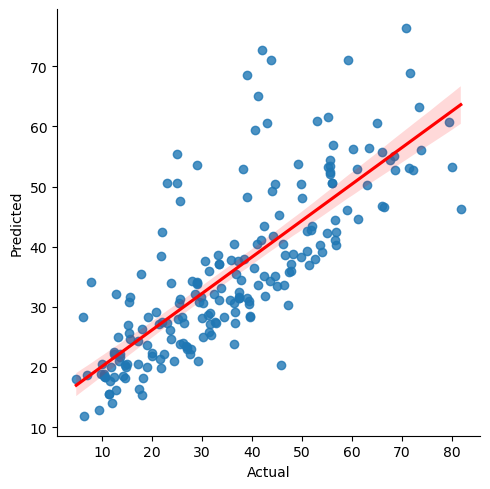

In [644]:
lin_df_1=pd.DataFrame({"Actual":y2test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6161
Adjusted R2: 0.6123
RMSE: 11.1386


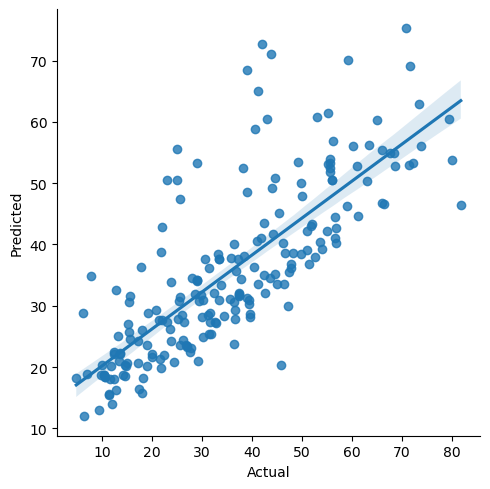

In [645]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x2train, y2train)

# Predictions
las_eda_p = la.predict(x2test)

# Evaluation
las_eda_r2 = la.score(x2train, y2train)
las_eda_ar2 = 1 - ((1 - las_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)
las_eda_mse = metrics.mean_squared_error(y2test, las_eda_p)
las_eda_rmse = np.sqrt(las_eda_mse)

# Display Results
print(f"R2: {las_eda_r2:.4f}")
print(f"Adjusted R2: {las_eda_ar2:.4f}")
print(f"RMSE: {las_eda_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y2test, "Predicted": las_eda_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")

---------------------------------
## Ridge

R2: 0.6163
Adjusted R2: 0.6126
RMSE: 11.1239


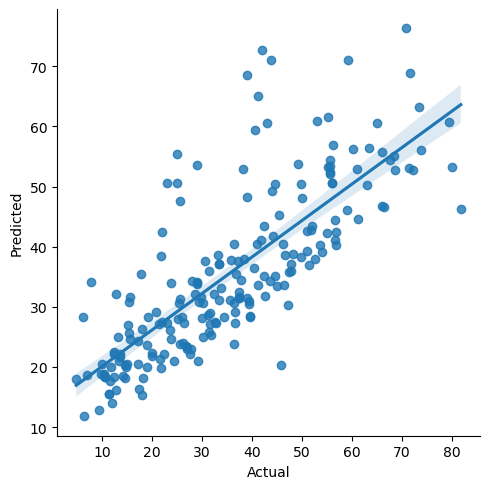

In [646]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x2train, y2train)

# Predictions
rid_eda_p = rd.predict(x2test)

# Evaluation
rid_eda_r2 = rd.score(x2train, y2train)
rid_eda_ar2 = 1 - ((1 - rid_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)
rid_eda_mse = metrics.mean_squared_error(y2test, rid_eda_p)
rid_eda_rmse = np.sqrt(rid_eda_mse)

# Display Results
print(f"R2: {rid_eda_r2:.4f}")
print(f"Adjusted R2: {rid_eda_ar2:.4f}")
print(f"RMSE: {rid_eda_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y2test, "Predicted": rid_eda_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [647]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x2train,y2train)
xgbr_p_1 = xgbr.predict(x2test)
xgbr_eda_r2 = xgbr.score(x2train,y2train)
print("R square:", xgbr_eda_r2)
n = x2train.shape[0]  # Number of observations
k = x2train.shape[1]  # Number of predictors (features)
xgbr_eda_ar2 = 1 - ((1 - xgbr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_eda_ar2)
from sklearn import metrics
xgbr_eda_mse = metrics.mean_squared_error(y2test,xgbr_p_1)
# print("mse:", xgbr_eda_mse)
xgbr_eda_rmse = np.sqrt(xgbr_eda_mse)
print("XGBR rmse:- ",xgbr_eda_rmse)

R square: 0.9236895853458872
Adjusted R square: 0.9229405260609388
XGBR rmse:-  6.321983844908733


--------------------------
## RF-Regressor

In [648]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x2train,y2train)
rfr_p_1 = rfr.predict(x2test)
rfr_eda_r2 = rfr.score(x2train,y2train)
print("R square:", rfr_eda_r2)
n = x2train.shape[0]  # Number of observations
k = x2train.shape[1]  # Number of predictors (features)
rfr_eda_ar2 = 1 - ((1 - rfr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_eda_ar2)
from sklearn import metrics
rfr_eda_mse = metrics.mean_squared_error(y2test,rfr_p_1)
# print("mse:", rfr_eda_mse)
rfr_eda_rmse = np.sqrt(rfr_eda_mse)
print("rfr rmse:- ",rfr_eda_rmse)

R square: 0.9872018503202626
Adjusted R square: 0.9870762243111364
rfr rmse:-  5.254428420552903


# Comparision of model

In [649]:
list1=['linear','Lasso','Ridge','RFR','XGBR']
list2=[lin_eda_r2,las_eda_r2,rid_eda_r2,rfr_eda_r2,xgbr_eda_r2]
list3=[lin_eda_ar2,las_eda_ar2,rid_eda_ar2,rfr_eda_ar2,xgbr_eda_ar2]
list4=[lin_eda_rmse,las_eda_rmse,rid_eda_rmse,rfr_eda_rmse,xgbr_eda_rmse]

In [650]:
final2=pd.DataFrame({'modelname':list1,'r2':list2,'a_r2':list3,'rmse':list4})
final2

,modelname,r2,a_r2,rmse
0,linear,0.616350,0.612584,11.123891
1,Lasso,0.616117,0.612349,11.138631
2,Ridge,0.616350,0.612584,11.123891
3,RFR,0.987202,0.987076,5.254428
4,XGBR,0.923690,0.922941,6.321984


In [651]:
final

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.986922,0.986793,5.432291
4,XGBR,0.923814,0.923067,6.316849


---------------------------
# Feature selection

In [652]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x2train, y2train)
la_p=la.predict(x2test)
#la_p
la.coef_
df2=pd.DataFrame({'importances':list(la.coef_),'columns':list(x2)})
df2

,importances,columns
0,0.107259,cement
1,0.089208,blast_furnace_slag
2,0.075193,fly_ash
3,-0.204762,water
4,0.189607,superplasticizer
5,0.001093,coarse_aggregate
6,0.004460,fine_aggregate
7,0.119712,age


we will drop coarse_aggregate,fine_aggregate

In [656]:
new_data_x=x2.drop(['coarse_aggregate','fine_aggregate '],axis=1)
new_data_y = y2.copy()

In [659]:
new_data_x.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,age
0,540.0,0.0,0.0,162.0,2.5,28
1,540.0,0.0,0.0,162.0,2.5,28
2,332.5,142.5,0.0,228.0,0.0,270
3,332.5,142.5,0.0,228.0,0.0,365
4,198.6,132.4,0.0,192.0,0.0,360


In [660]:
x_tr,x_te,y_tr,y_te=train_test_split(new_data_x,new_data_y,test_size=0.2,random_state=101)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((824, 6), (206, 6), (824,), (206,))